In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scraper
import ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [3]:
def fetch_csv(directory='/home/jupyter/',ticker='AMZN'):
    try:
        data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t') 
    except Exception:
        print('Reading csv for ticker %s failed' %ticker)
        try:
            scraper.somethingScraper(directory=directory, ticker=ticker)
        except Exception:
            print('Scrapping failed for ticker %s ' %ticker)
            data = pd.dataframe()
        else:
            data = pd.read_csv(directory+'data-'+ticker+'.csv',sep='\t')
    else:
        print('Read csv for ticker %s successful' %ticker)
    
    return data

In [47]:
df = fetch_csv()

Read csv for ticker AMZN successful


In [48]:
data = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume",fillna=False)

/opt/conda/lib/python3.7/site-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [49]:
pd.DataFrame(data.isna().sum(axis = 0)).head(40)

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
volume_adi,0
volume_obv,0
volume_cmf,19


In [50]:
pd.DataFrame(data.isna().sum(axis = 0)).tail(40)

,0
trend_ema_fast,11
trend_ema_slow,25
trend_adx,0
trend_adx_pos,0
trend_adx_neg,0
trend_vortex_ind_pos,14
trend_vortex_ind_neg,14
trend_vortex_ind_diff,14
trend_trix,43
trend_mass_index,40


In [52]:
data = data.drop(data.head(50).index)
#data = data.drop(['trend_psar_up','trend_psar_down'],axis=1,inplace=False)

In [54]:
pd.DataFrame(data.isna().sum(axis = 0)).head(40)

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
volume_adi,0
volume_obv,0
volume_cmf,0


In [44]:
pd.DataFrame(data.isna().sum(axis = 0)).tail(40)

,0
trend_sma_fast,0
trend_sma_slow,0
trend_ema_fast,0
trend_ema_slow,0
trend_adx,0
trend_adx_pos,0
trend_adx_neg,0
trend_vortex_ind_pos,0
trend_vortex_ind_neg,0
trend_vortex_ind_diff,0


In [56]:
#data.describe().to_csv('describe.csv')

In [58]:
data.shape

(5713, 77)

In [120]:
extract = data.head(20)

In [65]:
def scale_0_1(df):
    df = df.copy()
    scaler = MinMaxScaler()
    df[df.select_dtypes(exclude='object').columns]=scaler.fit_transform(df[df.select_dtypes(exclude='object').columns])
    return df

In [86]:
def scale_1_1(df):
    df = df.copy()
    scaler = MaxAbsScaler()
    df[df.select_dtypes(exclude='object').columns]=scaler.fit_transform(df[df.select_dtypes(exclude='object').columns])
    return df

In [121]:
extract = scale_0_1(extract)

In [108]:
extract.describe()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.803398,0.820786,0.820919,0.807440,0.807440,0.401448,-0.308104,0.850652,0.366778,0.349020,...,0.767904,0.560207,0.582593,-0.450533,0.572638,0.887067,0.189975,0.082558,0.063520,0.697572
std,0.104799,0.107663,0.100308,0.105633,0.105633,0.263714,0.647096,0.081318,0.386080,0.344355,...,0.161388,0.345447,0.314143,0.344870,0.297750,0.055115,0.454560,0.479082,0.459659,0.165903
min,0.673786,0.664773,0.698347,0.672464,0.672464,0.067361,-1.000000,0.746352,-0.279041,-0.050912,...,0.470189,0.009821,0.156256,-1.000000,0.104132,0.844084,-0.473653,-0.947788,-1.000000,0.485584
25%,0.736408,0.733902,0.746384,0.726570,0.726570,0.205828,-0.916057,0.785532,0.112465,0.048055,...,0.641229,0.305891,0.297165,-0.704425,0.315485,0.847241,-0.149405,-0.093997,-0.092213,0.570562
50%,0.759223,0.784091,0.784607,0.772464,0.772464,0.360466,-0.491155,0.834191,0.212705,0.234304,...,0.782142,0.502353,0.552642,-0.508290,0.617327,0.850357,0.154802,-0.020996,-0.020482,0.642640
75%,0.887864,0.913352,0.876033,0.921498,0.921498,0.476637,0.354855,0.923214,0.765807,0.606217,...,0.880522,0.906030,0.855069,-0.105288,0.814698,0.921913,0.646546,0.276642,0.263510,0.876707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.730418,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-0.011475,1.000000,1.000000,1.000000,1.000000,0.903785,1.000000


In [122]:
extract.set_index('Date',inplace=True)
                
extract.index = pd.to_datetime(extract.index)


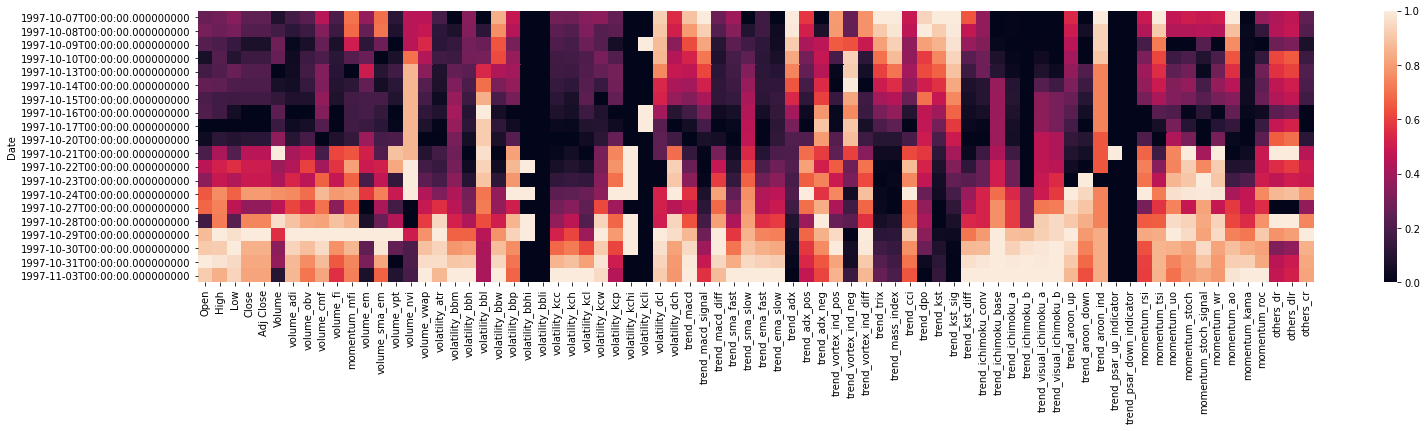

In [123]:
fig, ax = plt.subplots(figsize=(25, 5))
    #ax.plot(X_jrp[0], cmap='binary', origin='lower')
ax = sns.heatmap(extract)